### 다중 선형회귀 - 보스톤 주택 가격

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

- 데이터 탐색

In [5]:
df = pd.read_csv('data/Boston_house.csv')
df.shape

(506, 14)

In [6]:
df.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


- Feature 별 산점도와 선형회귀선

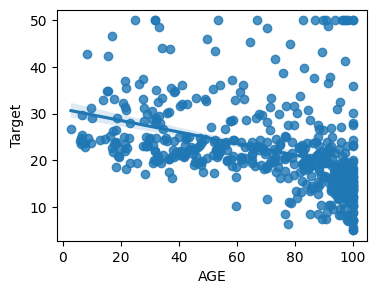

In [9]:
plt.figure(figsize=(4,3))
sns.regplot(x='AGE', y='Target', data=df);

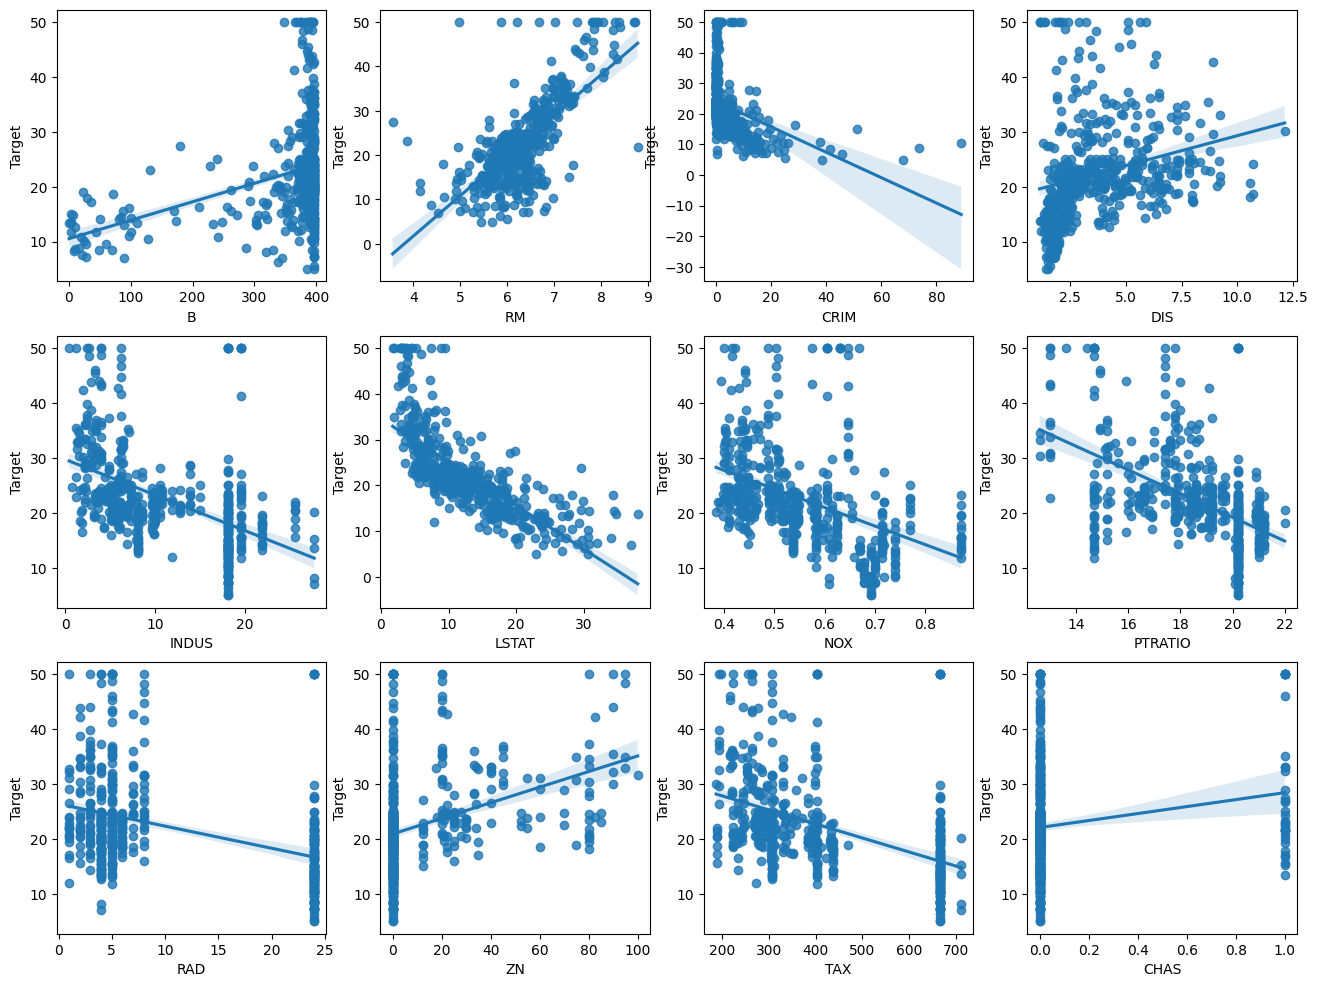

In [10]:
fig, axs = plt.subplots(3, 4, figsize=(16,12))
for i, feature in enumerate(df.columns[1:-1]):
    row, col = i // 4, i % 4
    sns.regplot(x=feature, y='Target', data=df, ax=axs[row][col])

- Feature 별 결정 계수(R squared)

In [11]:
from sklearn.linear_model import LinearRegression
for feature in df.columns[:-1]:
    lr = LinearRegression()
    X = df[feature].values.reshape(-1,1)
    lr.fit(X, df.Target.values)
    score = lr.score(X, df.Target.values)
    print(f'{feature}: {score:.4f}')

AGE: 0.1421
B: 0.1112
RM: 0.4835
CRIM: 0.1508
DIS: 0.0625
INDUS: 0.2340
LSTAT: 0.5441
NOX: 0.1826
PTRATIO: 0.2578
RAD: 0.1456
ZN: 0.1299
TAX: 0.2195
CHAS: 0.0307


##### 다중 선형회귀

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:, :-1].values, df.Target.values, test_size=0.1, random_state=2023
)

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
# 결정 계수(R squared)
lr.score(X_test, y_test)

0.7271717469533648

In [15]:
# 가중치
lr.coef_

array([-1.10277063e-03,  7.58599968e-03,  3.87404592e+00, -1.08509288e-01,
       -1.47219747e+00,  2.93056817e-02, -5.45214900e-01, -1.77344364e+01,
       -8.96196130e-01,  2.79148815e-01,  4.73634512e-02, -1.16000238e-02,
        2.88757692e+00])

In [16]:
# 편향
lr.intercept_

35.78228139597018

- 회귀식<br>
    Target = -0.0011 * AGE + 0.0076 * B + 3.9 * RM + ... + 2.9 * CHAS + 35.8

- 테스트 데이터에 적용

In [17]:
X_test[0], y_test[0]

(array([ 95.3    , 319.98   ,   6.006  ,   7.02259,   1.8746 ,  18.1    ,
         15.7    ,   0.718  ,  20.2    ,  24.     ,   0.     , 666.     ,
          0.     ]),
 14.2)

In [18]:
# weight와 bias를 이용하여 직접 계산
np.dot(lr.coef_, X_test[0]) + lr.intercept_

17.958305169593746

In [19]:
# predict() method 사용
lr.predict(X_test[0].reshape(1,-1))[0]

17.958305169593746

In [20]:
# 10개 테스트 데이터에 적용
pred = lr.predict(X_test)
for i in range(10):
    print(f'실제값: {y_test[i]},\t예측값: {pred[i]:.4f}')

실제값: 14.2,	예측값: 17.9583
실제값: 15.6,	예측값: 15.6069
실제값: 23.7,	예측값: 27.4749
실제값: 20.4,	예측값: 19.7022
실제값: 23.1,	예측값: 24.9588
실제값: 50.0,	예측값: 40.8837
실제값: 23.2,	예측값: 22.2554
실제값: 36.0,	예측값: 36.1518
실제값: 17.1,	예측값: 19.5734
실제값: 14.1,	예측값: 16.1215
